# Bonjour les amis
(hello friends in french)
 
Today we will Predict Stock price using RNN-LSTM 

DO UPVOTE IF YOU LIKE THE NOTEBOOK.
THANK YOU

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

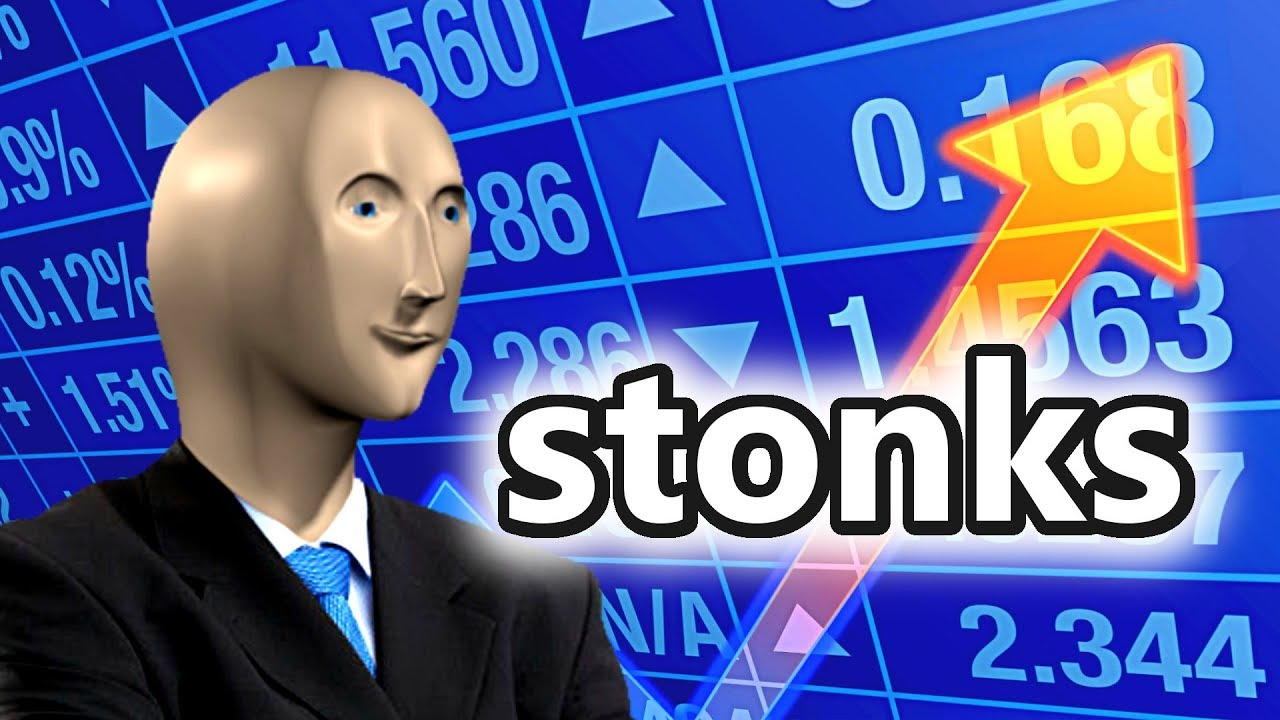

DISCLAIMER : the future stocks prices are always independent of their past

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler

import tensorflow
from keras.layers import LSTM, Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

1. Importing the dataset

In [ ]:
test = pd.read_csv('../input/gooogle-stock-price/Google_Stock_Price_Test.csv')

train = pd.read_csv('../input/gooogle-stock-price/Google_Stock_Price_Train.csv')

In [ ]:
train.head(120)

In [ ]:
train_Set = train.iloc[:,1:2].values

train_Set

In [ ]:
minmaxsc = MinMaxScaler()

train_Set = minmaxsc.fit_transform(train_Set)

In [ ]:
len(train_Set)

In [ ]:
x_train = []
y_train = []

for i in range(120,len(train_Set)):
    x_train.append(train_Set[i-120:i,0])
    y_train.append(train_Set[i,0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()

model.add(LSTM(units = 100,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1))

In [ ]:
opt = Adam(lr=0.001)
model.compile(loss = 'mean_squared_error',optimizer = opt)

In [ ]:
history = model.fit(x_train,y_train,epochs = 100,batch_size = 32)

In [ ]:
plt.plot(history.history['loss']) 
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
real_stock_price = test.iloc[:,1:2].values

In [ ]:
dataset = pd.concat((train['Open'],test['Open']), axis = 0)
inputs = dataset[len(dataset) - len(test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = minmaxsc.transform(inputs)

x_test = []
for i in range(120,140):
    x_test.append(inputs[i-120:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predict = model.predict(x_test)
predict = minmaxsc.inverse_transform(predict)

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predict, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()